In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from am_analysis import am_analysis as ama
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 10)

    

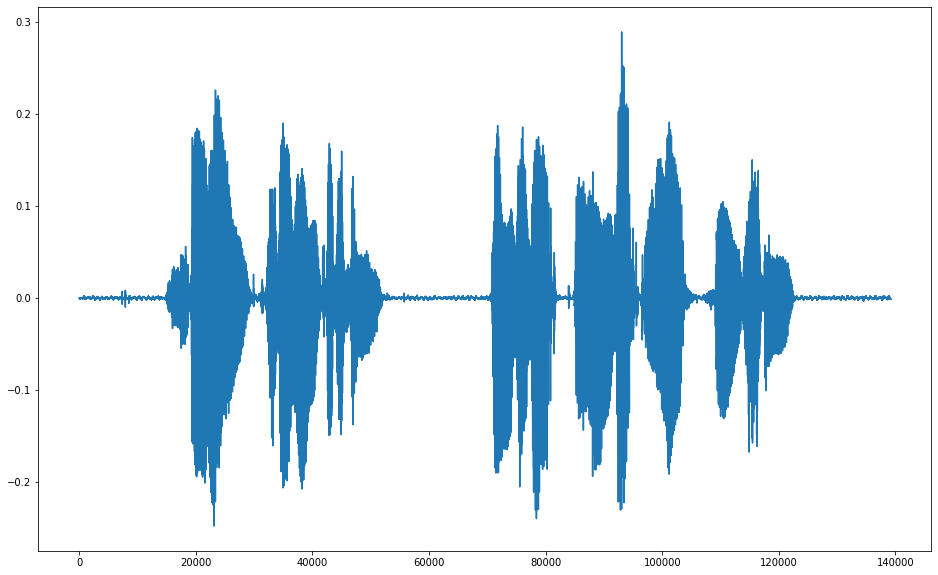

In [67]:
fs, x = wavfile.read('audio/peak_am_freq/270cn.wav')
x_name = ['speech']
#Assuming that the wav-file is 16 bit integer, the range is [-32768, 32767], thus dividing by 32768 (2^15) will give the proper twos-complement range of [-1, 1-2^-15]
x = x / 32768
plt.plot(x);plt.show()

In [54]:
## 短时傅里叶变化 获取 spectrum

win_size_sec = 0.04  # window length for the STFFT (seconds)
win_shft_sec = 0.01  # shift between consecutive windows (seconds)

fft_factor_x = 1
fft_factor_y = 1


spectrogram_data = ama.strfft_spectrogram(x, fs, win_size = round(win_size_sec*fs), win_shift = round(win_shft_sec*fs))
n_windows, n_freqs, n_channels = spectrogram_data['rFFT_spectrogram'].shape
# Number of elements for the 2nd FFT
#plt.figure()
##stft_spectrogram = ama.strfft_spectrogram(x, fs, win_size = round(win_size_sec*fs), win_shift = round(win_shft_sec*fs), channel_names = x_name)
#plt.subplot2grid((4,5),(1,0),rowspan=1, colspan=5)
#ama.plot_spectrogram_data(stft_spectrogram)
#spectrogram_data

win_shift = round(win_shft_sec*fs)
#print(n_windows, n_freqs, n_channels)
fs_mod = 1 / (win_shift / fs)


In [55]:
for i_channel in range(0, n_channels):
    spectrogram_1ch = np.sqrt(spectrogram_data['power_spectrogram'][:,:,i_channel]) 
    mod_psd_struct = ama.rfft_psd(spectrogram_1ch, fs_mod, n_fft_x)
    fmod_ax = mod_psd_struct['freq_axis']
    # modulation frequency delta
    fmod_delta = mod_psd_struct['freq_delta']
    n_freqsmod = len(fmod_ax)
    rFFT_modspec = np.zeros((n_freqs, n_freqsmod ,n_channels), dtype = complex)
    pwr_modspec  = np.zeros((n_freqs, n_freqsmod ,n_channels))

NameError: name 'n_fft_x' is not defined

In [ ]:
rFFT_modspec[:, :, i_channel] = mod_psd_struct['rFFT'].transpose()
pwr_modspec[:, :, i_channel] = mod_psd_struct['PSD'].transpose()
pwr_modspec = pwr_modspec / fmod_delta


In [68]:
modulation_spectrogram_data = ama.strfft_modulation_spectrogram(x, fs, win_size = round(win_size_sec*fs), win_shift = round(win_shft_sec*fs), channel_names = x_name)
modulation_spectrogram_data.keys()

X_pwr = modulation_spectrogram_data['power_modulation_spectrogram'][:, :, 0]
f_ax = modulation_spectrogram_data['freq_axis']
modf_ax = modulation_spectrogram_data['freq_mod_axis']

Text(0, 0.5, 'conventional frequency (Hz)')

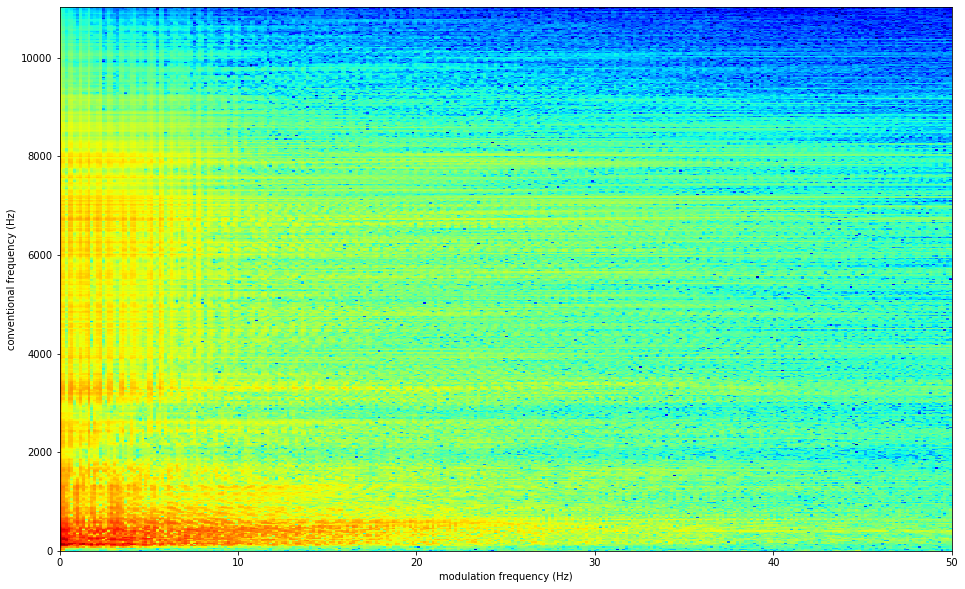

In [69]:
MF, F = np.meshgrid(modf_ax, f_ax)
X_plot = 10 * np.log10(X_pwr[:,:] + np.finfo(float).eps) 
pmesh = plt.pcolormesh(MF, F, X_plot, cmap ='jet')
plt.xlabel('modulation frequency (Hz)')
plt.ylabel('conventional frequency (Hz)')

In [ ]:
    def plot_one_modulation_spectrogram(ax, X_pwr, f_ax, modf_ax, title_str, f_range, modf_range, c_range, c_map):
        """
        Plots ONLY ONE Modulation Spectrogram
        """
        MF, F = np.meshgrid(modf_ax, f_ax) 
        X_plot = 10 * np.log10(X_pwr[:,:] + np.finfo(float).eps) 
        pmesh = plt.pcolormesh(MF, F, X_plot, cmap =c_map)
    
        # Major and Minor ticks
        ax = plt.gca()
        ax.xaxis.set_major_locator(ticker.AutoLocator())
        ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
        ax.yaxis.set_major_locator(ticker.AutoLocator())
        ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
             
        plt.xlabel('modulation frequency (Hz)')
        plt.ylabel('conventional frequency (Hz)')
    
    
        if modf_range is not None:
            xlim = modf_range
        else:
            xlim = modf_ax
    
        if f_range is not None:
            ylim = f_range
        else:
            ylim = f_ax
    
        # set the limits of the plot to the limits of the data
        plt.axis([xlim.min(), xlim.max(), ylim.min(), ylim.max()])
          
        if c_range is not None:
            clim = c_range
        else:
            clim = np.array([np.mean(X_plot), np.amax(X_plot)])  
    
        pmesh.set_clim(vmin=clim[0], vmax=clim[1])
    
        plt.colorbar()
        plt.title(title_str)
        plt.draw()
      
    # validate 'ix' argument    
    if ix is None:
        ix  = range(0, modulation_spectrogram_data['power_modulation_spectrogram'].shape[2])
    elif np.isscalar(ix):
        ix = np.array([ix])
    
    # Check if ix has ONLY one element
    if len(ix) == 1:
        new_figure = False
        # Retrieve Current Axes handle from the Current Figure, if there is not
        # Current Figure, it's generated here       
        ax = plt.gca()
    else:
        new_figure = True

    for i_channel in ix:      
        if new_figure:
            plt.figure()
            ax = plt.gca()
        plot_one_modulation_spectrogram(ax, 
                             modulation_spectrogram_data['power_modulation_spectrogram'][:, :, i_channel], 
                             modulation_spectrogram_data['freq_axis'], 
                             modulation_spectrogram_data['freq_mod_axis'], 
                             modulation_spectrogram_data['channel_names'][i_channel],
                             f_range, modf_range, c_range, c_map)  